In [1]:
import tensorflow as tf
from tensorflow import keras
import shap
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

c:\Users\Rawan Alamily\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\Rawan Alamily\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-

In [2]:
heart_csv_path = 'C:/Users/Rawan Alamily/Downloads/McSCert Co-op/explainable-ai-heart/predictive-models/personal-indicators-model/data/life-heart.csv'
dataframe = pd.read_csv(heart_csv_path)
dataframe['target'] = np.where(dataframe['heartDisease']=='Yes', 1, 0)
dataframe = dataframe.drop(columns=['heartDisease'])
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
df = dataframe.copy()
# designate for fitting rus
y = df.pop('target')
X = df
train, val, test = np.split(dataframe.sample(frac=1), [int(0.6*len(dataframe)), int(0.9*len(dataframe))])
y_train = train.pop('target')
X_train = train
y_test = test.pop('target')
X_test = test

# resample via undersampling majority class - this is favoured over oversampling as the dataset is very large
rus = RandomUnderSampler(random_state=0)
rus.fit(X,y)
# only resample training dataset
X_train_resampled, y_train_resampled = rus.fit_resample(X_train,y_train)
neg0, pos0 = np.bincount(y_train_resampled)
print("No.negative samples after undersampling",neg0)
print("No.positive samples after undersampling",pos0)

No.negative samples after undersampling 16507
No.positive samples after undersampling 16507


In [3]:
model = keras.models.load_model("C:/Users/Rawan Alamily/Downloads/McSCert Co-op/explainable-ai-heart/predictive-models/personal-indicators-model/saved-model")

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
[]
0
[]
1
[]
0
ListWrapper([1])
ListWrapper([1])
[]
0
[]
1
[]
0
ListWrapper([1])
ListWrapper([1])
[]
0
[]
1
[]
0
ListWrapper([1])
ListWrapper([1])
[]
0
[]
1
[]
0
ListWrapper([1])
ListWrapper([1])
(56, 64)
-0.22360679774997896
0.22360679774997896
[43603869, 0]
[64]
0
(64, 128)
-0.1767766952966369
0.1767766952966369
[887333466, 0]
[128]
0
(128, 128)
-0.15309310892394862
0.15309310892394862
[27826341, 0]
[128]
0
(128, 64)
-0.1767766952966369
0.1767766952966369
[774290507, 0]
[64]
0
(64, 1)
-0.3038218101251
0.3038218101251
[459634960, 0]
[1]
0
[]
0
[]
0
[]
0
[]
0
[1 2]
[b'No' b'Yes']
[1 2]
[b'No' b'Yes']
[1 2]
[b'No' b'Yes']
[b'Good' b'Very good' b'Fair' b'Excellent' b'Poor']
[1 2 3 4 5]
[1 2]
[b'Yes' b'No']
[1 2 3 4]
[b'No' b'Yes' b'No, borderline diabetes' b'Yes (during pregnancy)']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[b'70-74' b'80 or older' b'65-69' b'60-64' b'75-79' b'55-59' b'50-54'
 b'45-49' b'40-44' b'35-39' b'18-24' b'30-3

In [4]:
training_data = X_train.iloc[:10,:]

In [5]:
def f(X):
    bmi = tf.convert_to_tensor(X[:,0],dtype=np.float64) #float
    smoking = tf.convert_to_tensor(X[:,1]) #str
    alcohol = tf.convert_to_tensor(X[:,2]) #str
    stroke = tf.convert_to_tensor(X[:,3]) #str
    physical = tf.convert_to_tensor(X[:,4],dtype=np.int64) #int
    mental = tf.convert_to_tensor(X[:,5],dtype=np.int64) #int
    walk = tf.convert_to_tensor(X[:,6]) #str
    sex = tf.convert_to_tensor(X[:,7]) #str
    age = tf.convert_to_tensor(X[:,8]) #str
    diabetic = tf.convert_to_tensor(X[:,9]) #str
    activity = tf.convert_to_tensor(X[:,10]) #str
    health = tf.convert_to_tensor(X[:,11]) #str
    sleep = tf.convert_to_tensor(X[:,12],dtype=np.int64) #int
    asthma = tf.convert_to_tensor(X[:,13]) #str
    kidney = tf.convert_to_tensor(X[:,14]) #str
    skinCancer = tf.convert_to_tensor(X[:,15]) #str
    X_dict = {'bmi': bmi, 'smoking': smoking,'alcoholDrinking': alcohol, 'stroke': stroke, 'physicalHealth': physical,
             'mentalHealth': mental, 'diffWalk': walk, 'sex': sex, 'ageGroup': age,'diabetic': diabetic, 'physicalActivity': activity, 
             'overallHealth': health, 'sleepHours': sleep, 'asthma': asthma,  'kidneyDisease': kidney, 'skinCancer': skinCancer}
    X_ds = tf.data.Dataset.from_tensor_slices((X_dict))
    X_ds = X_ds.batch(128)
    return model.predict(X_ds)

In [6]:
explainer = shap.KernelExplainer(f, data=training_data)

[27.63 21.95 31.32 40.35 35.61 24.63 41.73 16.3 21.52 29.53]
['Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes']
['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']
['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']
[0 0 0 30 30 0 0 2 30 28]
[25 20 0 0 30 0 0 0 0 30]
['No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes']
['Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Male' 'Female'
 'Male' 'Male']
['25-29' '30-34' '40-44' '65-69' '60-64' '80 or older' '35-39' '25-29'
 '65-69' '45-49']
['No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' 'Good' 'Fair' 'Very good' 'Very good'
 'Excellent' 'Good' 'Fair']
[7 6 6 8 4 8 7 8 8 5]
['No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes']
['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']
['No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No']
128
False
0
1/1 [==============================] - 1s 509ms/step


In [7]:
# get single input shap feature plot
shap_values = explainer.shap_values(X_test.iloc[1,:])
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[1,:])

[31.93]
['No']
['No']
['Yes']
[0]
[0]
['No']
['Female']
['75-79']
['No']
['Yes']
['Good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[31.93 31.93 31.93 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '75-79' '75-79' '75-79']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

In [8]:
# get for multiple input
shap_values = explainer.shap_values(X_test.iloc[:200,:]);
print("done finding shap values")

  0%|          | 0/200 [00:00<?, ?it/s]

[21.29]
['No']
['No']
['No']
[10]
[14]
['No']
['Male']
['25-29']
['No']
['Yes']
['Excellent']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[21.29 21.29 21.29 ... 21.29 21.29 21.29]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 14 14 14]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '25-29' '25-29']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

  0%|          | 1/200 [00:00<03:17,  1.01it/s]

[31.93]
['No']
['No']
['Yes']
[0]
[0]
['No']
['Female']
['75-79']
['No']
['Yes']
['Good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[31.93 31.93 31.93 ... 31.93 31.93 31.93]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[

  1%|          | 2/200 [00:02<03:27,  1.05s/it]

[21.92]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['65-69']
['No']
['Yes']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[21.92 21.92 21.92 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[

  2%|▏         | 3/200 [00:03<03:30,  1.07s/it]

[27.44]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['45-49']
['Yes']
['No']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[27.44 27.44 27.44 ... 27.44 27.44 27.44]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '45-49' '45-49' '45-49']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

  2%|▏         | 4/200 [00:04<03:29,  1.07s/it]

[25.69]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['55-59']
['No']
['Yes']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[25.69 25.69 25.69 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '55-59' '55-59' '55-59']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


  2%|▎         | 5/200 [00:05<03:30,  1.08s/it]

[28.84]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['80 or older']
['No']
['No']
['Excellent']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 27ms/step
[28.84 28.84 28.84 ... 28.84 28.84 28.84]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '80 or older' '80 or older' '80 or older']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0

  3%|▎         | 6/200 [00:06<03:32,  1.10s/it]

[41.16]
['Yes']
['No']
['No']
[21]
[4]
['No']
['Male']
['75-79']
['Yes']
['Yes']
['Good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 19ms/step
[41.16 41.16 41.16 ... 41.16 41.16 41.16]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 4 4 4]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '75-79' '75-79' '75-79']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0

  4%|▎         | 7/200 [00:07<03:32,  1.10s/it]

[20.8]
['Yes']
['Yes']
['No']
[7]
[0]
['No']
['Female']
['80 or older']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['Yes']
128
False
0
1/1 [==============================] - 0s 106ms/step
[20.8 20.8 20.8 ... 20.8 20.8 20.8]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 7 7 7]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'Yes' 'Yes' 'Yes']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

  4%|▍         | 8/200 [00:08<03:33,  1.11s/it]

[35.43]
['No']
['No']
['No']
[30]
[0]
['Yes']
['Female']
['70-74']
['Yes']
['Yes']
['Fair']
[6]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 28ms/step
[35.43 35.43 35.43 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 30 30 30]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '70-74' '70-74' '70-74']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Fair' 'Fair' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

  4%|▍         | 9/200 [00:09<03:28,  1.09s/it]

[38.74]
['Yes']
['No']
['No']
[30]
[30]
['No']
['Male']
['80 or older']
['No, borderline diabetes']
['No']
['Fair']
[10]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[38.74 38.74 38.74 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 30 30 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '80 or older' '80 or older' '80 or older']
['No' 'No' 'No' ... 'No, borderline diabetes' 'No, borderline diabetes'
 'No, borderline diabetes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Fair' 'Fair' 'Fair']
[7 6 6 ... 10 10 10]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]

  5%|▌         | 10/200 [00:10<03:27,  1.09s/it]

[21.7]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['80 or older']
['No']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[21.7 21.7 21.7 ... 21.7 21.7 21.7]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1

  6%|▌         | 11/200 [00:11<03:24,  1.08s/it]

[28.32]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['55-59']
['Yes']
['No']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[28.32 28.32 28.32 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


  6%|▌         | 12/200 [00:12<03:20,  1.07s/it]

[24.69]
['No']
['No']
['No']
[30]
[0]
['No']
['Female']
['65-69']
['No']
['Yes']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[24.69 24.69 24.69 ... 24.69 24.69 24.69]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 30 30 30]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '65-69' '65-69' '65-69']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

  6%|▋         | 13/200 [00:13<03:17,  1.06s/it]

[27.05]
['No']
['No']
['No']
[5]
[4]
['Yes']
['Male']
['60-64']
['No']
['Yes']
['Good']
[5]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[27.05 27.05 27.05 ... 27.05 27.05 27.05]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 5 5 5]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '60-64' '60-64' '60-64']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

  7%|▋         | 14/200 [00:15<03:15,  1.05s/it]

[27.26]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['65-69']
['No']
['No']
['Good']
[8]
['No']
['No']
['Yes']
128
False
0
1/1 [==============================] - 0s 24ms/step
[27.26 27.26 27.26 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '65-69' '65-69' '65-69']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'Yes' 'Yes' 'Yes']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

  8%|▊         | 15/200 [00:16<03:16,  1.06s/it]

[24.39]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['70-74']
['No']
['Yes']
['Excellent']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[24.39 24.39 24.39 ... 24.39 24.39 24.39]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

  8%|▊         | 16/200 [00:17<03:13,  1.05s/it]

[28.34]
['No']
['No']
['No']
[3]
[20]
['No']
['Female']
['30-34']
['No']
['No']
['Excellent']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[28.34 28.34 28.34 ... 28.34 28.34 28.34]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '30-34' '30-34' '30-34']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


  8%|▊         | 17/200 [00:18<03:14,  1.06s/it]

[24.8]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['70-74']
['No']
['Yes']
['Good']
[7]
['No']
['Yes']
['No']
128
False
0
1/1 [==============================] - 0s 23ms/step
[24.8 24.8 24.8 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '70-74' '70-74' '70-74']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

  9%|▉         | 18/200 [00:19<03:13,  1.06s/it]

[25.85]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['25-29']
['No']
['Yes']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 20ms/step
[25.85 25.85 25.85 ... 25.85 25.85 25.85]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[

 10%|▉         | 19/200 [00:20<03:12,  1.06s/it]

[22.46]
['No']
['No']
['No']
[0]
[7]
['No']
['Female']
['30-34']
['No']
['No']
['Good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[22.46 22.46 22.46 ... 22.46 22.46 22.46]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1

 10%|█         | 20/200 [00:21<03:11,  1.06s/it]

[31.75]
['No']
['Yes']
['No']
[0]
[20]
['No']
['Female']
['35-39']
['No']
['Yes']
['Good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[31.75 31.75 31.75 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '35-39' '35-39' '35-39']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 10%|█         | 21/200 [00:22<03:19,  1.11s/it]

[28.35]
['No']
['No']
['No']
[0]
[3]
['No']
['Female']
['70-74']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 19ms/step
[28.35 28.35 28.35 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 3 3 3]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '70-74' '70-74' '70-74']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 11%|█         | 22/200 [00:23<03:10,  1.07s/it]

[30.67]
['No']
['Yes']
['No']
[0]
[0]
['No']
['Female']
['55-59']
['No']
['Yes']
['Excellent']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[30.67 30.67 30.67 ... 30.67 30.67 30.67]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]

 12%|█▏        | 23/200 [00:24<03:10,  1.08s/it]

[37.93]
['No']
['No']
['No']
[10]
[0]
['No']
['Male']
['60-64']
['No']
['No']
['Good']
[4]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[37.93 37.93 37.93 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '60-64' '60-64' '60-64']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 4 4 4]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

 12%|█▏        | 24/200 [00:25<03:03,  1.04s/it]

[27.34]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['75-79']
['Yes']
['Yes']
['Good']
[6]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[27.34 27.34 27.34 ... 27.34 27.34 27.34]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 12%|█▎        | 25/200 [00:26<03:06,  1.07s/it]

[21.91]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['45-49']
['No']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[21.91 21.91 21.91 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1

 13%|█▎        | 26/200 [00:27<03:04,  1.06s/it]

[36.56]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['65-69']
['No']
['Yes']
['Good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 16ms/step
[36.56 36.56 36.56 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '65-69' '65-69' '65-69']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 14%|█▎        | 27/200 [00:28<03:04,  1.07s/it]

[25.11]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['65-69']
['No']
['Yes']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[25.11 25.11 25.11 ... 25.11 25.11 25.11]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '65-69' '65-69' '65-69']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 14%|█▍        | 28/200 [00:30<03:07,  1.09s/it]

[42.07]
['Yes']
['No']
['No']
[2]
[7]
['Yes']
['Female']
['70-74']
['Yes']
['No']
['Good']
[8]
['Yes']
['Yes']
['Yes']
128
False
0
1/1 [==============================] - 0s 25ms/step
[42.07 42.07 42.07 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 14%|█▍        | 29/200 [00:31<03:09,  1.11s/it]

[30.7]
['Yes']
['No']
['No']
[2]
[0]
['No']
['Male']
['55-59']
['No']
['Yes']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 23ms/step
[30.7 30.7 30.7 ... 30.7 30.7 30.7]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 2 2]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '55-59' '55-59' '55-59']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 15%|█▌        | 30/200 [00:32<03:10,  1.12s/it]

[20.98]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['55-59']
['No']
['Yes']
['Good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[20.98 20.98 20.98 ... 20.98 20.98 20.98]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 16%|█▌        | 31/200 [00:33<03:07,  1.11s/it]

[44.29]
['No']
['No']
['No']
[30]
[30]
['No']
['Female']
['50-54']
['Yes']
['Yes']
['Fair']
[3]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[44.29 44.29 44.29 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 30 30 30]
[25 20 0 ... 30 30 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '50-54' '50-54' '50-54']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Fair' 'Fair' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 16%|█▌        | 32/200 [00:34<03:07,  1.12s/it]

[32.28]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['60-64']
['Yes']
['Yes']
['Good']
[9]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[32.28 32.28 32.28 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '60-64' '60-64' '60-64']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

 16%|█▋        | 33/200 [00:35<03:06,  1.11s/it]

[29.71]
['No']
['No']
['No']
[0]
[0]
['Yes']
['Female']
['60-64']
['No']
['Yes']
['Good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[29.71 29.71 29.71 ... 29.71 29.71 29.71]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '60-64' '60-64' '60-64']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 17%|█▋        | 34/200 [00:36<03:05,  1.12s/it]

[26.91]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['80 or older']
['No']
['Yes']
['Good']
[8]
['No']
['No']
['Yes']
128
False
0
1/1 [==============================] - 0s 24ms/step
[26.91 26.91 26.91 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '80 or older' '80 or older' '80 or older']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'Yes' 'Yes' 'Yes']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 18%|█▊        | 35/200 [00:37<03:05,  1.13s/it]

[25.09]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['70-74']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[25.09 25.09 25.09 ... 25.09 25.09 25.09]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 18%|█▊        | 36/200 [00:38<03:00,  1.10s/it]

[34.21]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['55-59']
['No']
['Yes']
['Excellent']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[34.21 34.21 34.21 ... 34.21 34.21 34.21]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '55-59' '55-59' '55-59']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1

 18%|█▊        | 37/200 [00:40<02:59,  1.10s/it]

[24.33]
['Yes']
['No']
['No']
[0]
[2]
['No']
['Female']
['60-64']
['No']
['Yes']
['Excellent']
[7]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[24.33 24.33 24.33 ... 24.33 24.33 24.33]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

 19%|█▉        | 38/200 [00:41<02:57,  1.10s/it]

[30.3]
['Yes']
['No']
['No']
[3]
[3]
['No']
['Female']
['50-54']
['No']
['Yes']
['Good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[30.3 30.3 30.3 ... 30.3 30.3 30.3]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 3 3 3]
[25 20 0 ... 3 3 3]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]

 20%|█▉        | 39/200 [00:42<02:56,  1.10s/it]

[29.76]
['No']
['No']
['No']
[0]
[2]
['No']
['Male']
['60-64']
['Yes']
['No']
['Good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 39ms/step
[29.76 29.76 29.76 ... 29.76 29.76 29.76]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 2 2 2]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

 20%|██        | 40/200 [00:43<02:53,  1.08s/it]

[23.63]
['No']
['No']
['No']
[0]
[30]
['Yes']
['Male']
['65-69']
['No']
['Yes']
['Good']
[4]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 23ms/step
[23.63 23.63 23.63 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 30 30 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '65-69' '65-69' '65-69']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 4 4 4]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 20%|██        | 41/200 [00:44<02:53,  1.09s/it]

[25.06]
['No']
['No']
['No']
[0]
[7]
['No']
['Female']
['70-74']
['No']
['Yes']
['Very good']
[9]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[25.06 25.06 25.06 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 7 7 7]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 21%|██        | 42/200 [00:45<02:55,  1.11s/it]

[25.54]
['Yes']
['No']
['No']
[0]
[4]
['No']
['Female']
['35-39']
['No']
['Yes']
['Very good']
[7]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 27ms/step
[25.54 25.54 25.54 ... 25.54 25.54 25.54]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 4 4 4]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1

 22%|██▏       | 43/200 [00:46<02:52,  1.10s/it]

[40.89]
['Yes']
['No']
['No']
[0]
[0]
['Yes']
['Male']
['55-59']
['No']
['No']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[40.89 40.89 40.89 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]

 22%|██▏       | 44/200 [00:47<02:50,  1.09s/it]

[23.06]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['25-29']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 22ms/step
[23.06 23.06 23.06 ... 23.06 23.06 23.06]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

 22%|██▎       | 45/200 [00:48<02:45,  1.07s/it]

[32.1]
['Yes']
['Yes']
['No']
[0]
[4]
['No']
['Male']
['25-29']
['No']
['Yes']
['Excellent']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 22ms/step
[32.1 32.1 32.1 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 23%|██▎       | 46/200 [00:49<02:48,  1.09s/it]

[33.72]
['Yes']
['No']
['Yes']
[15]
[0]
['Yes']
['Male']
['55-59']
['No']
['No']
['Poor']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 26ms/step
[33.72 33.72 33.72 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
[0 0 0 ... 15 15 15]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '55-59' '55-59' '55-59']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Poor' 'Poor' 'Poor']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 24%|██▎       | 47/200 [00:51<02:48,  1.10s/it]

[26.32]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['35-39']
['No']
['Yes']
['Excellent']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[26.32 26.32 26.32 ... 26.32 26.32 26.32]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 24%|██▍       | 48/200 [00:52<02:47,  1.10s/it]

[30.68]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['65-69']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 33ms/step
[30.68 30.68 30.68 ... 30.68 30.68 30.68]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '65-69' '65-69' '65-69']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1

 24%|██▍       | 49/200 [00:53<02:48,  1.11s/it]

[22.89]
['No']
['No']
['No']
[0]
[28]
['No']
['Male']
['25-29']
['No']
['Yes']
['Fair']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[22.89 22.89 22.89 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 28 28 28]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '25-29' '25-29']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Fair' 'Fair' 'Fair']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1

 25%|██▌       | 50/200 [00:54<02:48,  1.12s/it]

[21.46]
['No']
['No']
['No']
[0]
[1]
['No']
['Female']
['30-34']
['No']
['Yes']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 26ms/step
[21.46 21.46 21.46 ... 21.46 21.46 21.46]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 1 1 1]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 26%|██▌       | 51/200 [00:55<02:47,  1.12s/it]

[29.66]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['70-74']
['No']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[29.66 29.66 29.66 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

 26%|██▌       | 52/200 [00:56<02:43,  1.11s/it]

[25.8]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['60-64']
['No']
['No']
['Excellent']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[25.8 25.8 25.8 ... 25.8 25.8 25.8]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

 26%|██▋       | 53/200 [00:57<02:41,  1.10s/it]

[21.95]
['No']
['No']
['No']
[20]
[30]
['No']
['Female']
['55-59']
['No']
['Yes']
['Good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 23ms/step
[21.95 21.95 21.95 ... 21.95 21.95 21.95]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 30 30 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '55-59' '55-59' '55-59']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

 27%|██▋       | 54/200 [00:58<02:41,  1.11s/it]

[30.11]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['70-74']
['No']
['No']
['Excellent']
[5]
['No']
['No']
['Yes']
128
False
0
1/1 [==============================] - 0s 29ms/step
[30.11 30.11 30.11 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'Yes' 'Yes' 'Yes']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[

 28%|██▊       | 55/200 [00:59<02:37,  1.09s/it]

[23.4]
['No']
['No']
['No']
[0]
[2]
['No']
['Female']
['60-64']
['No']
['Yes']
['Excellent']
[4]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[23.4 23.4 23.4 ... 23.4 23.4 23.4]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 2 2 2]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 4 4 4]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 28%|██▊       | 56/200 [01:00<02:35,  1.08s/it]

[32.78]
['No']
['No']
['No']
[0]
[10]
['No']
['Male']
['75-79']
['Yes']
['Yes']
['Fair']
[9]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[32.78 32.78 32.78 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 10 10 10]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Fair' 'Fair' 'Fair']
[7 6 6 ... 9 9 9]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 28%|██▊       | 57/200 [01:02<02:35,  1.08s/it]

[28.34]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['65-69']
['No']
['Yes']
['Excellent']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 21ms/step
[28.34 28.34 28.34 ... 28.34 28.34 28.34]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

 29%|██▉       | 58/200 [01:03<02:33,  1.08s/it]

[30.27]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['60-64']
['No']
['Yes']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[30.27 30.27 30.27 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '60-64' '60-64' '60-64']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

 30%|██▉       | 59/200 [01:04<02:32,  1.08s/it]

[25.1]
['Yes']
['No']
['No']
[30]
[30]
['No']
['Male']
['45-49']
['Yes']
['No']
['Poor']
[4]
['No']
['Yes']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[25.1 25.1 25.1 ... 25.1 25.1 25.1]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 30 30 30]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Poor' 'Poor' 'Poor']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

 30%|███       | 60/200 [01:05<02:33,  1.09s/it]

[18.4]
['No']
['No']
['No']
[0]
[3]
['No']
['Female']
['55-59']
['Yes']
['Yes']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[18.4 18.4 18.4 ... 18.4 18.4 18.4]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 30%|███       | 61/200 [01:06<02:34,  1.11s/it]

[26.39]
['No']
['No']
['No']
[0]
[2]
['No']
['Male']
['18-24']
['No']
['Yes']
['Excellent']
[9]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 16ms/step
[26.39 26.39 26.39 ... 26.39 26.39 26.39]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 2 2 2]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '18-24' '18-24' '18-24']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 31%|███       | 62/200 [01:07<02:33,  1.11s/it]

[22.15]
['Yes']
['No']
['No']
[2]
[4]
['No']
['Male']
['50-54']
['No']
['No']
['Good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[22.15 22.15 22.15 ... 22.15 22.15 22.15]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '50-54' '50-54' '50-54']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 32%|███▏      | 63/200 [01:08<02:29,  1.09s/it]

[28.19]
['No']
['No']
['No']
[5]
[0]
['Yes']
['Female']
['70-74']
['No']
['Yes']
['Fair']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 31ms/step
[28.19 28.19 28.19 ... 28.19 28.19 28.19]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '70-74' '70-74' '70-74']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Fair' 'Fair' 'Fair']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 32%|███▏      | 64/200 [01:09<02:26,  1.08s/it]

[25.39]
['Yes']
['No']
['Yes']
[10]
[0]
['Yes']
['Female']
['60-64']
['Yes']
['Yes']
['Fair']
[5]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[25.39 25.39 25.39 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 5 5 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1

 32%|███▎      | 65/200 [01:10<02:24,  1.07s/it]

[21.29]
['Yes']
['No']
['No']
[30]
[0]
['No']
['Male']
['60-64']
['No']
['No']
['Fair']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[21.29 21.29 21.29 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 30 30 30]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '60-64' '60-64' '60-64']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Fair' 'Fair' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 33%|███▎      | 66/200 [01:11<02:23,  1.07s/it]

[30.67]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['65-69']
['No']
['No']
['Good']
[9]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[30.67 30.67 30.67 ... 30.67 30.67 30.67]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '65-69' '65-69' '65-69']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[

 34%|███▎      | 67/200 [01:12<02:22,  1.07s/it]

[30.27]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['80 or older']
['No']
['Yes']
['Very good']
[9]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[30.27 30.27 30.27 ... 30.27 30.27 30.27]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0

 34%|███▍      | 68/200 [01:13<02:20,  1.06s/it]

[22.89]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['50-54']
['No']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 16ms/step
[22.89 22.89 22.89 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '50-54' '50-54' '50-54']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 34%|███▍      | 69/200 [01:15<02:22,  1.09s/it]

[30.27]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['60-64']
['No']
['No']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[30.27 30.27 30.27 ... 30.27 30.27 30.27]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[

 35%|███▌      | 70/200 [01:16<02:20,  1.08s/it]

[25.25]
['No']
['No']
['No']
[20]
[0]
['Yes']
['Female']
['70-74']
['No']
['No']
['Good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[25.25 25.25 25.25 ... 25.25 25.25 25.25]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

 36%|███▌      | 71/200 [01:17<02:19,  1.08s/it]

[34.46]
['No']
['No']
['No']
[30]
[0]
['Yes']
['Female']
['60-64']
['Yes']
['No']
['Fair']
[9]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[34.46 34.46 34.46 ... 34.46 34.46 34.46]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 30 30 30]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Fair' 'Fair' 'Fair']
[7 6 6 ... 9 9 9]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

 36%|███▌      | 72/200 [01:18<02:16,  1.07s/it]

[23.67]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['75-79']
['No, borderline diabetes']
['Yes']
['Very good']
[7]
['Yes']
['No']
['Yes']
128
False
0
1/1 [==============================] - 0s 32ms/step
[23.67 23.67 23.67 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '75-79' '75-79' '75-79']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'Yes' 'Yes' 'Yes']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1

 36%|███▋      | 73/200 [01:19<02:17,  1.08s/it]

[18.89]
['No']
['No']
['No']
[15]
[0]
['Yes']
['Female']
['80 or older']
['No']
['No']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[18.89 18.89 18.89 ... 18.89 18.89 18.89]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 15 15 15]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

 37%|███▋      | 74/200 [01:20<02:15,  1.08s/it]

[20.18]
['Yes']
['No']
['No']
[30]
[30]
['Yes']
['Male']
['40-44']
['No']
['No']
['Poor']
[6]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[20.18 20.18 20.18 ... 20.18 20.18 20.18]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 30 30 30]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

 38%|███▊      | 75/200 [01:21<02:13,  1.07s/it]

[27.37]
['Yes']
['No']
['No']
[0]
[5]
['No']
['Male']
['50-54']
['No']
['Yes']
['Very good']
[8]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[27.37 27.37 27.37 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 5 5 5]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '50-54' '50-54' '50-54']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 38%|███▊      | 76/200 [01:22<02:15,  1.09s/it]

[29.68]
['Yes']
['No']
['No']
[6]
[0]
['No']
['Male']
['70-74']
['Yes']
['Yes']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[29.68 29.68 29.68 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 38%|███▊      | 77/200 [01:23<02:15,  1.10s/it]

[24.27]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['50-54']
['No']
['No']
['Excellent']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[24.27 24.27 24.27 ... 24.27 24.27 24.27]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '50-54' '50-54' '50-54']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]

 39%|███▉      | 78/200 [01:24<02:13,  1.10s/it]

[39.87]
['Yes']
['No']
['No']
[0]
[3]
['No']
['Female']
['35-39']
['No']
['Yes']
['Excellent']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[39.87 39.87 39.87 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '35-39' '35-39' '35-39']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1

 40%|███▉      | 79/200 [01:25<02:12,  1.10s/it]

[28.19]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['65-69']
['No']
['Yes']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 33ms/step
[28.19 28.19 28.19 ... 28.19 28.19 28.19]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '65-69' '65-69' '65-69']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

 40%|████      | 80/200 [01:27<02:12,  1.11s/it]

[26.45]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['50-54']
['No, borderline diabetes']
['Yes']
['Good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[26.45 26.45 26.45 ... 26.45 26.45 26.45]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No, borderline diabetes' 'No, borderline diabetes'
 'No, borderline diabetes']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 40%|████      | 81/200 [01:28<02:10,  1.10s/it]

[24.03]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['75-79']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 31ms/step
[24.03 24.03 24.03 ... 24.03 24.03 24.03]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '75-79' '75-79' '75-79']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 41%|████      | 82/200 [01:29<02:08,  1.09s/it]

[36.92]
['No']
['No']
['No']
[10]
[0]
['No']
['Male']
['45-49']
['No']
['Yes']
['Fair']
[5]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 16ms/step
[36.92 36.92 36.92 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 10 10 10]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '45-49' '45-49' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Fair' 'Fair' 'Fair']
[7 6 6 ... 5 5 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0

 42%|████▏     | 83/200 [01:30<02:06,  1.08s/it]

[21.46]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['55-59']
['No']
['Yes']
['Excellent']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 16ms/step
[21.46 21.46 21.46 ... 21.46 21.46 21.46]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '55-59' '55-59' '55-59']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1

 42%|████▏     | 84/200 [01:31<02:05,  1.08s/it]

[26.63]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['55-59']
['No']
['No']
['Good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[26.63 26.63 26.63 ... 26.63 26.63 26.63]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0

 42%|████▎     | 85/200 [01:32<02:05,  1.09s/it]

[48.88]
['No']
['No']
['No']
[0]
[0]
['Yes']
['Male']
['40-44']
['No']
['Yes']
['Fair']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 33ms/step
[48.88 48.88 48.88 ... 48.88 48.88 48.88]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Fair' 'Fair' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

 43%|████▎     | 86/200 [01:33<02:05,  1.10s/it]

[34.75]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['55-59']
['Yes']
['No']
['Very good']
[7]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[34.75 34.75 34.75 ... 34.75 34.75 34.75]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

 44%|████▎     | 87/200 [01:34<02:04,  1.10s/it]

[32.08]
['Yes']
['No']
['No']
[0]
[30]
['No']
['Male']
['55-59']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[32.08 32.08 32.08 ... 32.08 32.08 32.08]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 30 30 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 44%|████▍     | 88/200 [01:35<02:03,  1.10s/it]

[25.06]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['80 or older']
['No']
['Yes']
['Good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[25.06 25.06 25.06 ... 25.06 25.06 25.06]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '80 or older' '80 or older' '80 or older']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 44%|████▍     | 89/200 [01:36<02:03,  1.11s/it]

[34.96]
['No']
['No']
['No']
[5]
[2]
['No']
['Female']
['55-59']
['Yes']
['No']
['Fair']
[16]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[34.96 34.96 34.96 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 2 2 2]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Fair' 'Fair' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]

 45%|████▌     | 90/200 [01:38<02:02,  1.12s/it]

[19.53]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['70-74']
['No']
['No']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[19.53 19.53 19.53 ... 19.53 19.53 19.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '70-74' '70-74' '70-74']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

 46%|████▌     | 91/200 [01:39<02:01,  1.12s/it]

[27.25]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['35-39']
['No']
['Yes']
['Good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 23ms/step
[27.25 27.25 27.25 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '35-39' '35-39' '35-39']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1

 46%|████▌     | 92/200 [01:40<02:01,  1.13s/it]

[29.79]
['Yes']
['No']
['No']
[1]
[0]
['No']
['Female']
['70-74']
['Yes']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[29.79 29.79 29.79 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 1 1 1]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 46%|████▋     | 93/200 [01:41<01:59,  1.12s/it]

[23.49]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['80 or older']
['No']
['Yes']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 30ms/step
[23.49 23.49 23.49 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '80 or older' '80 or older' '80 or older']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1

 47%|████▋     | 94/200 [01:42<01:59,  1.12s/it]

[28.06]
['No']
['No']
['No']
[2]
[30]
['No']
['Male']
['70-74']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[28.06 28.06 28.06 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 2 2]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '70-74' '70-74' '70-74']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

 48%|████▊     | 95/200 [01:43<01:56,  1.11s/it]

[22.3]
['No']
['No']
['No']
[5]
[1]
['No']
['Female']
['65-69']
['No']
['Yes']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[22.3 22.3 22.3 ... 22.3 22.3 22.3]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 48%|████▊     | 96/200 [01:44<01:56,  1.12s/it]

[25.85]
['No']
['No']
['No']
[0]
[5]
['No']
['Male']
['30-34']
['No']
['Yes']
['Very good']
[9]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[25.85 25.85 25.85 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 5 5 5]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 9 9 9]
['No' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 48%|████▊     | 97/200 [01:45<01:55,  1.12s/it]

[80.04]
['Yes']
['Yes']
['No']
[0]
[0]
['No']
['Male']
['18-24']
['No']
['Yes']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 27ms/step
[80.04 80.04 80.04 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1

 49%|████▉     | 98/200 [01:47<01:54,  1.12s/it]

[24.28]
['Yes']
['No']
['No']
[0]
[3]
['No']
['Male']
['18-24']
['No']
['Yes']
['Very good']
[9]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[24.28 24.28 24.28 ... 24.28 24.28 24.28]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '18-24' '18-24' '18-24']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 9 9 9]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

 50%|████▉     | 99/200 [01:48<01:52,  1.11s/it]

[31.82]
['Yes']
['No']
['No']
[0]
[30]
['No']
['Female']
['65-69']
['No']
['No']
['Good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[31.82 31.82 31.82 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 30 30 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '65-69' '65-69' '65-69']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0

 50%|█████     | 100/200 [01:49<01:53,  1.13s/it]

[35.7]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['55-59']
['No']
['Yes']
['Very good']
[14]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[35.7 35.7 35.7 ... 35.7 35.7 35.7]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '55-59' '55-59' '55-59']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 14 14 14]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1

 50%|█████     | 101/200 [01:50<01:52,  1.14s/it]

[26.39]
['Yes']
['No']
['No']
[4]
[20]
['No']
['Female']
['60-64']
['No']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[26.39 26.39 26.39 ... 26.39 26.39 26.39]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '60-64' '60-64' '60-64']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1

 51%|█████     | 102/200 [01:51<01:55,  1.17s/it]

[20.6]
['No']
['No']
['No']
[2]
[15]
['No']
['Female']
['25-29']
['No']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[20.6 20.6 20.6 ... 20.6 20.6 20.6]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 2 2]
[25 20 0 ... 15 15 15]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '25-29' '25-29']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[

 52%|█████▏    | 103/200 [01:52<01:52,  1.16s/it]

[40.35]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['40-44']
['No']
['Yes']
['Good']
[5]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[40.35 40.35 40.35 ... 40.35 40.35 40.35]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 5 5 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 52%|█████▏    | 104/200 [01:53<01:50,  1.15s/it]

[30.03]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['65-69']
['No']
['Yes']
['Fair']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 39ms/step
[30.03 30.03 30.03 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '65-69' '65-69' '65-69']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

 52%|█████▎    | 105/200 [01:55<01:49,  1.15s/it]

[24.63]
['Yes']
['No']
['Yes']
[18]
[0]
['Yes']
['Male']
['60-64']
['No']
['Yes']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 27ms/step
[24.63 24.63 24.63 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
[0 0 0 ... 18 18 18]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '60-64' '60-64' '60-64']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

 53%|█████▎    | 106/200 [01:56<01:48,  1.16s/it]

[32.78]
['Yes']
['No']
['No']
[15]
[20]
['Yes']
['Female']
['60-64']
['No']
['Yes']
['Poor']
[10]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[32.78 32.78 32.78 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 20 20 20]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 10 10 10]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 54%|█████▎    | 107/200 [01:57<01:45,  1.13s/it]

[30.9]
['No']
['No']
['No']
[19]
[15]
['Yes']
['Female']
['25-29']
['No']
['No']
['Good']
[7]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[30.9 30.9 30.9 ... 30.9 30.9 30.9]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 19 19 19]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 54%|█████▍    | 108/200 [01:58<01:44,  1.13s/it]

[31.89]
['Yes']
['No']
['No']
[25]
[15]
['Yes']
['Female']
['70-74']
['Yes']
['No']
['Good']
[12]
['No']
['No']
['Yes']
128
False
0
1/1 [==============================] - 0s 24ms/step
[31.89 31.89 31.89 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 15 15 15]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '70-74' '70-74' '70-74']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 12 12 12]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0

 55%|█████▍    | 109/200 [01:59<01:44,  1.15s/it]

[41.09]
['Yes']
['No']
['No']
[20]
[30]
['No']
['Male']
['35-39']
['No']
['Yes']
['Poor']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[41.09 41.09 41.09 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 20 20 20]
[25 20 0 ... 30 30 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Poor' 'Poor' 'Poor']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]

 55%|█████▌    | 110/200 [02:00<01:40,  1.12s/it]

[32.01]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['60-64']
['Yes']
['Yes']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[32.01 32.01 32.01 ... 32.01 32.01 32.01]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '60-64' '60-64' '60-64']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

 56%|█████▌    | 111/200 [02:01<01:39,  1.11s/it]

[29.26]
['Yes']
['Yes']
['No']
[0]
[0]
['No']
['Female']
['45-49']
['No']
['Yes']
['Very good']
[9]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 56ms/step
[29.26 29.26 29.26 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 9 9 9]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]

 56%|█████▌    | 112/200 [02:02<01:36,  1.10s/it]

[29.99]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['45-49']
['No']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[29.99 29.99 29.99 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1

 56%|█████▋    | 113/200 [02:03<01:35,  1.10s/it]

[22.32]
['No']
['No']
['No']
[10]
[10]
['No']
['Male']
['65-69']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[22.32 22.32 22.32 ... 22.32 22.32 22.32]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 10 10 10]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 57%|█████▋    | 114/200 [02:05<01:33,  1.09s/it]

[31.95]
['No']
['No']
['No']
[30]
[0]
['No']
['Male']
['65-69']
['Yes']
['Yes']
['Very good']
[5]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[31.95 31.95 31.95 ... 31.95 31.95 31.95]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 30 30 30]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 5 5 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 57%|█████▊    | 115/200 [02:06<01:31,  1.08s/it]

[21.02]
['Yes']
['No']
['No']
[0]
[13]
['No']
['Male']
['30-34']
['No']
['Yes']
['Very good']
[10]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 33ms/step
[21.02 21.02 21.02 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 13 13 13]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0

 58%|█████▊    | 116/200 [02:07<01:30,  1.08s/it]

[26.61]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['55-59']
['No']
['Yes']
['Excellent']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[26.61 26.61 26.61 ... 26.61 26.61 26.61]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 58%|█████▊    | 117/200 [02:08<01:31,  1.10s/it]

[26.5]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['40-44']
['No']
['Yes']
['Excellent']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[26.5 26.5 26.5 ... 26.5 26.5 26.5]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '40-44' '40-44' '40-44']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 59%|█████▉    | 118/200 [02:09<01:33,  1.14s/it]

[29.53]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['45-49']
['No']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[29.53 29.53 29.53 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '45-49' '45-49' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 60%|█████▉    | 119/200 [02:10<01:31,  1.13s/it]

[21.18]
['No']
['No']
['No']
[0]
[2]
['No']
['Female']
['40-44']
['No']
['Yes']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[21.18 21.18 21.18 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '40-44' '40-44' '40-44']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 60%|██████    | 120/200 [02:11<01:31,  1.14s/it]

[19.23]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['70-74']
['No']
['Yes']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[19.23 19.23 19.23 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '70-74' '70-74' '70-74']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0

 60%|██████    | 121/200 [02:12<01:30,  1.14s/it]

[20.02]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['55-59']
['No']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[20.02 20.02 20.02 ... 20.02 20.02 20.02]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '55-59' '55-59' '55-59']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

 61%|██████    | 122/200 [02:14<01:28,  1.14s/it]

[26.63]
['Yes']
['No']
['No']
[30]
[0]
['Yes']
['Male']
['60-64']
['Yes']
['No']
['Fair']
[4]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[26.63 26.63 26.63 ... 26.63 26.63 26.63]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 30 30 30]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '60-64' '60-64' '60-64']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Fair' 'Fair' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

 62%|██████▏   | 123/200 [02:15<01:28,  1.15s/it]

[23.18]
['Yes']
['No']
['No']
[30]
[0]
['No']
['Male']
['50-54']
['No']
['Yes']
['Poor']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 26ms/step
[23.18 23.18 23.18 ... 23.18 23.18 23.18]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 30 30 30]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '50-54' '50-54' '50-54']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

 62%|██████▏   | 124/200 [02:16<01:26,  1.14s/it]

[28.32]
['Yes']
['No']
['No']
[0]
[30]
['No']
['Female']
['65-69']
['No']
['Yes']
['Very good']
[4]
['Yes']
['No']
['Yes']
128
False
0
1/1 [==============================] - 0s 33ms/step
[28.32 28.32 28.32 ... 28.32 28.32 28.32]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '65-69' '65-69' '65-69']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 4 4 4]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'Yes' 'Yes' 'Yes']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 62%|██████▎   | 125/200 [02:17<01:24,  1.13s/it]

[30.0]
['Yes']
['No']
['No']
[0]
[5]
['No']
['Female']
['30-34']
['Yes']
['No']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[30.0 30.0 30.0 ... 30.0 30.0 30.0]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 5 5 5]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 63%|██████▎   | 126/200 [02:18<01:23,  1.13s/it]

[27.44]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['75-79']
['No']
['No']
['Good']
[8]
['No']
['No']
['Yes']
128
False
0
1/1 [==============================] - 0s 23ms/step
[27.44 27.44 27.44 ... 27.44 27.44 27.44]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '75-79' '75-79' '75-79']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0

 64%|██████▎   | 127/200 [02:19<01:21,  1.12s/it]

[27.25]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['30-34']
['No']
['Yes']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 33ms/step
[27.25 27.25 27.25 ... 27.25 27.25 27.25]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '30-34' '30-34' '30-34']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

 64%|██████▍   | 128/200 [02:20<01:19,  1.10s/it]

[26.58]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['55-59']
['No']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[26.58 26.58 26.58 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '55-59' '55-59' '55-59']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 64%|██████▍   | 129/200 [02:21<01:17,  1.10s/it]

[23.4]
['No']
['No']
['No']
[30]
[20]
['No']
['Female']
['35-39']
['No']
['Yes']
['Fair']
[10]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[23.4 23.4 23.4 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 30 30 30]
[25 20 0 ... 20 20 20]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '35-39' '35-39' '35-39']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Fair' 'Fair' 'Fair']
[7 6 6 ... 10 10 10]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1

 65%|██████▌   | 130/200 [02:22<01:16,  1.09s/it]

[40.24]
['No']
['No']
['No']
[0]
[25]
['No']
['Female']
['55-59']
['No']
['Yes']
['Good']
[5]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 16ms/step
[40.24 40.24 40.24 ... 40.24 40.24 40.24]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 25 25 25]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '55-59' '55-59' '55-59']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 5 5 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 66%|██████▌   | 131/200 [02:24<01:15,  1.10s/it]

[27.44]
['No']
['No']
['No']
[0]
[9]
['No']
['Female']
['35-39']
['No']
['Yes']
['Excellent']
[9]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 26ms/step
[27.44 27.44 27.44 ... 27.44 27.44 27.44]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '35-39' '35-39' '35-39']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 66%|██████▌   | 132/200 [02:25<01:14,  1.09s/it]

[24.39]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['50-54']
['No']
['No']
['Fair']
[4]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 23ms/step
[24.39 24.39 24.39 ... 24.39 24.39 24.39]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '50-54' '50-54' '50-54']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0

 66%|██████▋   | 133/200 [02:26<01:13,  1.09s/it]

[35.3]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['55-59']
['No']
['Yes']
['Excellent']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[35.3 35.3 35.3 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 67%|██████▋   | 134/200 [02:27<01:11,  1.09s/it]

[39.16]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['60-64']
['No']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 16ms/step
[39.16 39.16 39.16 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '60-64' '60-64' '60-64']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 68%|██████▊   | 135/200 [02:28<01:10,  1.08s/it]

[30.41]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['75-79']
['Yes']
['Yes']
['Good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 29ms/step
[30.41 30.41 30.41 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '75-79' '75-79' '75-79']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1

 68%|██████▊   | 136/200 [02:29<01:09,  1.08s/it]

[22.32]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['18-24']
['No']
['Yes']
['Excellent']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 27ms/step
[22.32 22.32 22.32 ... 22.32 22.32 22.32]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1

 68%|██████▊   | 137/200 [02:30<01:08,  1.09s/it]

[21.03]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['55-59']
['No']
['Yes']
['Excellent']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[21.03 21.03 21.03 ... 21.03 21.03 21.03]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '55-59' '55-59' '55-59']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 69%|██████▉   | 138/200 [02:31<01:08,  1.10s/it]

[25.77]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['35-39']
['No']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[25.77 25.77 25.77 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 70%|██████▉   | 139/200 [02:32<01:06,  1.09s/it]

[26.65]
['No']
['No']
['No']
[3]
[0]
['No']
['Male']
['60-64']
['No']
['Yes']
['Excellent']
[7]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 29ms/step
[26.65 26.65 26.65 ... 26.65 26.65 26.65]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 3 3 3]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

 70%|███████   | 140/200 [02:33<01:06,  1.11s/it]

[45.61]
['No']
['No']
['No']
[10]
[5]
['No']
['Female']
['30-34']
['No']
['Yes']
['Good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 96ms/step
[45.61 45.61 45.61 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 10 10 10]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '30-34' '30-34' '30-34']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 70%|███████   | 141/200 [02:35<01:06,  1.12s/it]

[28.25]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['55-59']
['No']
['Yes']
['Good']
[10]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 28ms/step
[28.25 28.25 28.25 ... 28.25 28.25 28.25]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '55-59' '55-59' '55-59']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 10 10 10]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 71%|███████   | 142/200 [02:36<01:05,  1.12s/it]

[27.73]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['45-49']
['No']
['Yes']
['Excellent']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[27.73 27.73 27.73 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '45-49' '45-49' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

 72%|███████▏  | 143/200 [02:37<01:03,  1.11s/it]

[31.32]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['75-79']
['No']
['Yes']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[31.32 31.32 31.32 ... 31.32 31.32 31.32]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '75-79' '75-79' '75-79']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]

 72%|███████▏  | 144/200 [02:38<01:01,  1.10s/it]

[31.32]
['No']
['No']
['No']
[0]
[8]
['No']
['Male']
['18-24']
['No']
['Yes']
['Very good']
[6]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 26ms/step
[31.32 31.32 31.32 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '18-24' '18-24' '18-24']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

 72%|███████▎  | 145/200 [02:39<00:59,  1.09s/it]

[24.31]
['No']
['No']
['No']
[0]
[1]
['No']
['Male']
['50-54']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[24.31 24.31 24.31 ... 24.31 24.31 24.31]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1

 73%|███████▎  | 146/200 [02:40<00:58,  1.08s/it]

[31.28]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['80 or older']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[31.28 31.28 31.28 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

 74%|███████▎  | 147/200 [02:41<00:58,  1.11s/it]

[22.24]
['No']
['No']
['No']
[0]
[0]
['Yes']
['Male']
['80 or older']
['Yes']
['Yes']
['Good']
[10]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[22.24 22.24 22.24 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '80 or older' '80 or older' '80 or older']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

 74%|███████▍  | 148/200 [02:42<00:57,  1.11s/it]

[28.7]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['55-59']
['No']
['Yes']
['Fair']
[3]
['No']
['Yes']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[28.7 28.7 28.7 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 74%|███████▍  | 149/200 [02:43<00:56,  1.11s/it]

[33.52]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['70-74']
['Yes']
['No']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[33.52 33.52 33.52 ... 33.52 33.52 33.52]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '70-74' '70-74' '70-74']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

 75%|███████▌  | 150/200 [02:44<00:54,  1.10s/it]

[19.2]
['Yes']
['No']
['No']
[0]
[15]
['No']
['Male']
['18-24']
['No']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 27ms/step
[19.2 19.2 19.2 ... 19.2 19.2 19.2]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 15 15 15]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 76%|███████▌  | 151/200 [02:46<00:54,  1.11s/it]

[23.0]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['65-69']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[23.0 23.0 23.0 ... 23.0 23.0 23.0]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

 76%|███████▌  | 152/200 [02:47<00:52,  1.10s/it]

[28.48]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['45-49']
['No']
['Yes']
['Good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[28.48 28.48 28.48 ... 28.48 28.48 28.48]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '45-49' '45-49' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1

 76%|███████▋  | 153/200 [02:48<00:52,  1.11s/it]

[27.17]
['Yes']
['Yes']
['No']
[0]
[30]
['No']
['Male']
['70-74']
['No']
['Yes']
['Good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[27.17 27.17 27.17 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '70-74' '70-74' '70-74']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]

 77%|███████▋  | 154/200 [02:49<00:51,  1.12s/it]

[27.44]
['No']
['No']
['No']
[3]
[0]
['Yes']
['Female']
['80 or older']
['No']
['No']
['Good']
[7]
['No']
['No']
['Yes']
128
False
0
1/1 [==============================] - 0s 24ms/step
[27.44 27.44 27.44 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 3 3 3]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '80 or older' '80 or older' '80 or older']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 78%|███████▊  | 155/200 [02:50<00:50,  1.12s/it]

[28.34]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['80 or older']
['No']
['Yes']
['Good']
[7]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[28.34 28.34 28.34 ... 28.34 28.34 28.34]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '80 or older' '80 or older' '80 or older']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

 78%|███████▊  | 156/200 [02:51<00:50,  1.14s/it]

[26.45]
['No']
['No']
['No']
[2]
[5]
['No']
['Male']
['40-44']
['No']
['Yes']
['Excellent']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 49ms/step
[26.45 26.45 26.45 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 2 2]
[25 20 0 ... 5 5 5]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 78%|███████▊  | 157/200 [02:53<00:50,  1.17s/it]

[36.61]
['No']
['No']
['No']
[3]
[3]
['No']
['Female']
['50-54']
['No']
['Yes']
['Very good']
[8]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[36.61 36.61 36.61 ... 36.61 36.61 36.61]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 3 3 3]
[25 20 0 ... 3 3 3]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

 79%|███████▉  | 158/200 [02:54<00:49,  1.18s/it]

[23.69]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['60-64']
['No']
['Yes']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 25ms/step
[23.69 23.69 23.69 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '60-64' '60-64' '60-64']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 80%|███████▉  | 159/200 [02:55<00:48,  1.17s/it]

[22.89]
['No']
['No']
['No']
[3]
[2]
['No']
['Male']
['18-24']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[22.89 22.89 22.89 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 3 3 3]
[25 20 0 ... 2 2 2]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[

 80%|████████  | 160/200 [02:56<00:46,  1.17s/it]

[33.91]
['Yes']
['No']
['No']
[30]
[30]
['Yes']
['Male']
['45-49']
['No']
['No']
['Poor']
[4]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[33.91 33.91 33.91 ... 33.91 33.91 33.91]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 30 30 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '45-49' '45-49' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Poor' 'Poor' 'Poor']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 80%|████████  | 161/200 [02:57<00:45,  1.16s/it]

[27.86]
['No']
['No']
['No']
[4]
[0]
['No']
['Male']
['65-69']
['Yes']
['Yes']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 23ms/step
[27.86 27.86 27.86 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '65-69' '65-69' '65-69']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0

 81%|████████  | 162/200 [02:58<00:44,  1.17s/it]

[33.73]
['Yes']
['No']
['Yes']
[0]
[0]
['No']
['Female']
['65-69']
['No, borderline diabetes']
['Yes']
['Very good']
[7]
['No']
['No']
['Yes']
128
False
0
1/1 [==============================] - 0s 24ms/step
[33.73 33.73 33.73 ... 33.73 33.73 33.73]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'Yes' 'Yes' 'Yes']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0

 82%|████████▏ | 163/200 [03:00<00:44,  1.20s/it]

[25.75]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['70-74']
['No']
['Yes']
['Excellent']
[5]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[25.75 25.75 25.75 ... 25.75 25.75 25.75]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 5 5 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1

 82%|████████▏ | 164/200 [03:01<00:42,  1.18s/it]

[31.93]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['80 or older']
['No']
['Yes']
['Good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[31.93 31.93 31.93 ... 31.93 31.93 31.93]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '80 or older' '80 or older' '80 or older']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 82%|████████▎ | 165/200 [03:02<00:40,  1.17s/it]

[22.31]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['55-59']
['No']
['Yes']
['Excellent']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[22.31 22.31 22.31 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '55-59' '55-59' '55-59']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 83%|████████▎ | 166/200 [03:03<00:39,  1.17s/it]

[34.18]
['No']
['No']
['No']
[0]
[0]
['Yes']
['Female']
['80 or older']
['Yes']
['Yes']
['Fair']
[5]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[34.18 34.18 34.18 ... 34.18 34.18 34.18]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '80 or older' '80 or older' '80 or older']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Fair' 'Fair' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 84%|████████▎ | 167/200 [03:04<00:38,  1.16s/it]

[31.93]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['65-69']
['No']
['No']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[31.93 31.93 31.93 ... 31.93 31.93 31.93]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 84%|████████▍ | 168/200 [03:05<00:37,  1.16s/it]

[32.55]
['Yes']
['No']
['No']
[1]
[1]
['No']
['Male']
['60-64']
['No']
['Yes']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[32.55 32.55 32.55 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 1 1 1]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '60-64' '60-64' '60-64']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0

 84%|████████▍ | 169/200 [03:06<00:35,  1.15s/it]

[30.81]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['65-69']
['No']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[30.81 30.81 30.81 ... 30.81 30.81 30.81]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '65-69' '65-69' '65-69']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 85%|████████▌ | 170/200 [03:08<00:35,  1.17s/it]

[29.18]
['No']
['No']
['No']
[0]
[0]
['Yes']
['Female']
['65-69']
['No']
['No']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[29.18 29.18 29.18 ... 29.18 29.18 29.18]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '65-69' '65-69' '65-69']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1

 86%|████████▌ | 171/200 [03:09<00:33,  1.15s/it]

[22.5]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['60-64']
['No']
['Yes']
['Good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 9ms/step
[22.5 22.5 22.5 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 6ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]

 86%|████████▌ | 172/200 [03:10<00:33,  1.20s/it]

[23.4]
['No']
['No']
['No']
[0]
[5]
['No']
['Female']
['18-24']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 17ms/step
[23.4 23.4 23.4 ... 23.4 23.4 23.4]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 5 5 5]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '18-24' '18-24' '18-24']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 4ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 86%|████████▋ | 173/200 [03:11<00:31,  1.15s/it]

[28.29]
['Yes']
['No']
['No']
[0]
[3]
['No']
['Female']
['55-59']
['Yes']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 22ms/step
[28.29 28.29 28.29 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 3 3 3]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 87%|████████▋ | 174/200 [03:12<00:29,  1.15s/it]

[29.12]
['No']
['No']
['No']
[0]
[3]
['No']
['Female']
['25-29']
['No']
['Yes']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 33ms/step
[29.12 29.12 29.12 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '25-29' '25-29']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 88%|████████▊ | 175/200 [03:13<00:28,  1.13s/it]

[26.63]
['No']
['Yes']
['No']
[0]
[10]
['No']
['Female']
['65-69']
['No']
['Yes']
['Excellent']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 57ms/step
[26.63 26.63 26.63 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 10 10 10]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 9ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1

 88%|████████▊ | 176/200 [03:16<00:34,  1.45s/it]

[24.94]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['30-34']
['No']
['Yes']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 62ms/step
[24.94 24.94 24.94 ... 24.94 24.94 24.94]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 7ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1

 88%|████████▊ | 177/200 [03:17<00:36,  1.57s/it]

[28.8]
['Yes']
['No']
['No']
[30]
[30]
['Yes']
['Male']
['50-54']
['No']
['No']
['Poor']
[5]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 33ms/step
[28.8 28.8 28.8 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 30 30 30]
[25 20 0 ... 30 30 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '50-54' '50-54' '50-54']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Poor' 'Poor' 'Poor']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 6ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1

 89%|████████▉ | 178/200 [03:19<00:34,  1.58s/it]

[22.5]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['75-79']
['No']
['Yes']
['Excellent']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 37ms/step
[22.5 22.5 22.5 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '75-79' '75-79' '75-79']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 8ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 90%|████████▉ | 179/200 [03:21<00:35,  1.71s/it]

[35.15]
['No']
['No']
['No']
[0]
[0]
['Yes']
['Female']
['70-74']
['No']
['No']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 48ms/step
[35.15 35.15 35.15 ... 35.15 35.15 35.15]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '70-74' '70-74' '70-74']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 7ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 90%|█████████ | 180/200 [03:23<00:34,  1.74s/it]

[31.32]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['40-44']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 36ms/step
[31.32 31.32 31.32 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 8ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]

 90%|█████████ | 181/200 [03:25<00:33,  1.78s/it]

[28.89]
['No']
['No']
['No']
[0]
[15]
['No']
['Female']
['50-54']
['No']
['Yes']
['Very good']
[5]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 56ms/step
[28.89 28.89 28.89 ... 28.89 28.89 28.89]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 5 5 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 7ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 91%|█████████ | 182/200 [03:27<00:32,  1.79s/it]

[24.37]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['50-54']
['No']
['Yes']
['Good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[24.37 24.37 24.37 ... 24.37 24.37 24.37]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '50-54' '50-54' '50-54']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 7ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

 92%|█████████▏| 183/200 [03:28<00:30,  1.78s/it]

[31.87]
['Yes']
['No']
['No']
[30]
[0]
['Yes']
['Male']
['75-79']
['Yes']
['No']
['Poor']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 50ms/step
[31.87 31.87 31.87 ... 31.87 31.87 31.87]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '75-79' '75-79' '75-79']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 7ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

 92%|█████████▏| 184/200 [03:30<00:28,  1.78s/it]

[24.03]
['No']
['No']
['No']
[3]
[0]
['No']
['Female']
['70-74']
['No, borderline diabetes']
['Yes']
['Very good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 40ms/step
[24.03 24.03 24.03 ... 24.03 24.03 24.03]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '70-74' '70-74' '70-74']
['No' 'No' 'No' ... 'No, borderline diabetes' 'No, borderline diabetes'
 'No, borderline diabetes']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 7ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[

 92%|█████████▎| 185/200 [03:32<00:26,  1.79s/it]

[28.48]
['Yes']
['No']
['No']
[2]
[5]
['No']
['Male']
['30-34']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 40ms/step
[28.48 28.48 28.48 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 2 2]
[25 20 0 ... 5 5 5]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 6ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 93%|█████████▎| 186/200 [03:34<00:24,  1.76s/it]

[24.8]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['60-64']
['No']
['Yes']
['Excellent']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 50ms/step
[24.8 24.8 24.8 ... 24.8 24.8 24.8]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 6ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 94%|█████████▎| 187/200 [03:35<00:22,  1.70s/it]

[28.7]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['50-54']
['No']
['Yes']
['Very good']
[7]
['Yes']
['No']
['Yes']
128
False
0
1/1 [==============================] - 0s 31ms/step
[28.7 28.7 28.7 ... 28.7 28.7 28.7]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '50-54' '50-54' '50-54']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 110s 13ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[

 94%|█████████▍| 188/200 [05:26<06:51, 34.32s/it]

[28.34]
['Yes']
['No']
['No']
[30]
[0]
['No']
['Female']
['60-64']
['No']
['Yes']
['Very good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[28.34 28.34 28.34 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 30 30 30]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 8]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 8ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[

 94%|█████████▍| 189/200 [05:28<04:30, 24.62s/it]

[33.84]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['65-69']
['No']
['Yes']
['Very good']
[9]
['Yes']
['No']
['No']
128
False
0
1/1 [==============================] - 1s 550ms/step
[33.84 33.84 33.84 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 9 9 9]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 4s 20ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


 95%|█████████▌| 190/200 [05:34<03:10, 19.08s/it]

[21.14]
['No']
['No']
['No']
[0]
[2]
['No']
['Female']
['55-59']
['No']
['Yes']
['Very good']
[5]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 53ms/step
[21.14 21.14 21.14 ... 21.14 21.14 21.14]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 2 2 2]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 5 5 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 2s 10ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]

 96%|█████████▌| 191/200 [05:36<02:07, 14.13s/it]

[29.18]
['No']
['No']
['No']
[0]
[0]
['No']
['Female']
['70-74']
['No']
['No']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 63ms/step
[29.18 29.18 29.18 ... 29.18 29.18 29.18]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 8ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[

 96%|█████████▌| 192/200 [05:38<01:24, 10.52s/it]

[25.75]
['Yes']
['No']
['No']
[0]
[0]
['Yes']
['Female']
['65-69']
['No']
['Yes']
['Fair']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 57ms/step
[25.75 25.75 25.75 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '65-69' '65-69' '65-69']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 8ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


 96%|█████████▋| 193/200 [05:40<00:55,  7.97s/it]

[33.75]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['50-54']
['No']
['Yes']
['Very good']
[5]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 30ms/step
[33.75 33.75 33.75 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Very good' 'Very good'
 'Very good']
[7 6 6 ... 5 5 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]

 97%|█████████▋| 194/200 [05:42<00:36,  6.01s/it]

[29.37]
['No']
['No']
['No']
[30]
[15]
['Yes']
['Male']
['55-59']
['Yes']
['No']
['Good']
[4]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 28ms/step
[29.37 29.37 29.37 ... 29.37 29.37 29.37]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 30 30 30]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Good' 'Good' 'Good']
[7 6 6 ... 4 4 4]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 6ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]

 98%|█████████▊| 195/200 [05:43<00:23,  4.66s/it]

[27.34]
['No']
['No']
['No']
[0]
[0]
['No']
['Male']
['55-59']
['No']
['Yes']
['Excellent']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 32ms/step
[27.34 27.34 27.34 ... 27.34 27.34 27.34]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'Yes']
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '55-59' '55-59' '55-59']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Excellent'
 'Excellent']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

 98%|█████████▊| 196/200 [05:45<00:14,  3.66s/it]

[24.96]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Female']
['70-74']
['No']
['No']
['Very good']
[6]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 26ms/step
[24.96 24.96 24.96 ... 24.96 24.96 24.96]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '70-74' '70-74' '70-74']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 6 6 6]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[

 98%|█████████▊| 197/200 [05:46<00:08,  2.93s/it]

[22.86]
['Yes']
['No']
['Yes']
[21]
[0]
['No']
['Female']
['75-79']
['No']
['Yes']
['Fair']
[5]
['No']
['Yes']
['Yes']
128
False
0
1/1 [==============================] - 0s 30ms/step
[22.86 22.86 22.86 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 30]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
['25-29' '30-34' '40-44' ... '75-79' '75-79' '75-79']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'No' 'No' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Fair' 'Fair' 'Fair']
[7 6 6 ... 5 5 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 6ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


 99%|█████████▉| 198/200 [05:47<00:04,  2.45s/it]

[25.8]
['Yes']
['No']
['No']
[0]
[0]
['No']
['Male']
['80 or older']
['Yes']
['Yes']
['Good']
[8]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[25.8 25.8 25.8 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 2 30 28]
[25 20 0 ... 0 0 0]
['No' 'No' 'No' ... 'No' 'No' 'No']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 8 8 5]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]


100%|█████████▉| 199/200 [05:49<00:02,  2.11s/it]

[29.29]
['No']
['No']
['No']
[0]
[3]
['Yes']
['Female']
['60-64']
['No']
['Yes']
['Good']
[7]
['No']
['No']
['No']
128
False
0
1/1 [==============================] - 0s 24ms/step
[29.29 29.29 29.29 ... 16.3 21.52 29.53]
['Yes' 'No' 'Yes' ... 'No' 'Yes' 'Yes']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
[0 0 0 ... 0 0 0]
[25 20 0 ... 3 3 3]
['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
['Female' 'Female' 'Female' ... 'Female' 'Male' 'Male']
['25-29' '30-34' '40-44' ... '25-29' '65-69' '45-49']
['No' 'No' 'No' ... 'No' 'No' 'No']
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
['Very good' 'Excellent' 'Very good' ... 'Excellent' 'Good' 'Fair']
[7 6 6 ... 7 7 7]
['No' 'No' 'Yes' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
128
False
0
163/163 [==============================] - 1s 5ms/step
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]


100%|██████████| 200/200 [05:50<00:00,  1.75s/it]

done finding shap values


In [9]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[:200])

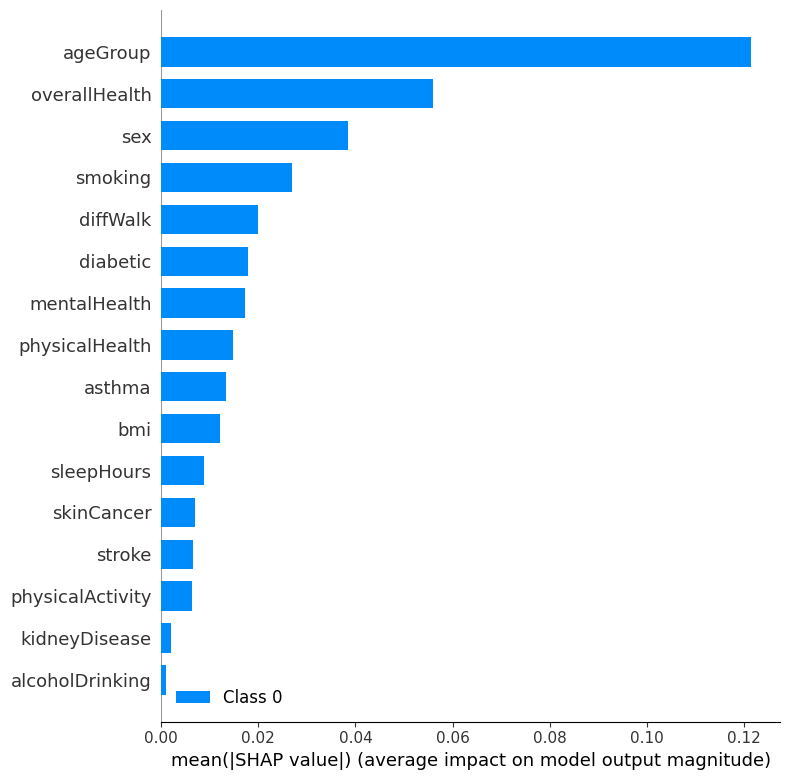

In [10]:
# bar plot for multiple inputs
shap.summary_plot(shap_values, X_test, plot_type="bar")